# Assignment 3

## Hyperparameter Tunning

### Zifeng Xu, Wendi Chu, Kefan Yu
### GU ID: , , ky285

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
random.seed(8649)

## 6. Data Preparation (7 Points)

### 6.1 Load the dataset and display the dataframe (2 Points).

In [2]:
# load the dataset.
df=pd.read_csv("online_shoppers_intention.csv")

# change the data type of the column
df["Weekend"] = df["Weekend"].astype(int)
df["Revenue"] = df["Revenue"].astype(int)

# convert the categorical values of the column VisitorType into a numerical representation
df.insert(loc=16, column="VisitorTypeNumeric", value=pd.factorize(df['VisitorType'])[0] + 1)
df = df.drop('VisitorType', 1)

# Define a prefix
prefix = 'g06_'

# Add the prefix to all column names
df.columns = [prefix + col for col in df.columns]

# display the dataframe
df.head()

C:\Users\84160\AppData\Local\Temp\ipykernel_22064\3079000137.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('VisitorType', 1)


,g06_Administrative,g06_Administrative_Duration,g06_Informational,g06_Informational_Duration,g06_ProductRelated,g06_ProductRelated_Duration,g06_BounceRates,g06_ExitRates,g06_PageValues,g06_SpecialDay,g06_Month,g06_OperatingSystems,g06_Browser,g06_Region,g06_TrafficType,g06_VisitorTypeNumeric,g06_Weekend,g06_Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,1,1,0


In [3]:
month = {
    'Feb': 2,
    'Mar': 3,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

df['g06_Month'] = df['g06_Month'].replace(month)

### 6.2 Use describe to provide statistics on the pandas Dataframe (2 Points).

In [4]:
df.describe()

,g06_Administrative,g06_Administrative_Duration,g06_Informational,g06_Informational_Duration,g06_ProductRelated,g06_ProductRelated_Duration,g06_BounceRates,g06_ExitRates,g06_PageValues,g06_SpecialDay,g06_Month,g06_OperatingSystems,g06_Browser,g06_Region,g06_TrafficType,g06_VisitorTypeNumeric,g06_Weekend,g06_Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,7.651987,2.124006,2.357097,3.147364,4.069586,1.151176,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,3.392841,0.911325,1.717277,2.401591,4.025169,0.376989,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,11.000000,3.000000,2.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,12.000000,8.000000,13.000000,9.000000,20.000000,3.000000,1.000000,1.000000


### 6.3 Split the dataset into a Training set and a Test set. Justify your preferred split (3 Points)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [6]:
X = df.loc[:, df.columns != 'g06_Revenue'].to_numpy()
y = df.iloc[:,-1:].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8649)

## 7. Classification Routine (12 Points)

### 7.1 RandomForestClassifier()

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [17]:
rf_fit = rf_clf.fit(X_train, y_train)

/var/folders/hv/08dyyt957zq3n_n6kttfl_180000gn/T/ipykernel_2191/2683726193.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_fit = rf_clf.fit(X_train, y_train)


In [18]:
y_pred = rf_fit.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

rf_accu = accuracy_score(y_test, y_pred)

In [46]:
print(rf_accu)

0.9091646390916464


<Figure size 360x360 with 0 Axes>

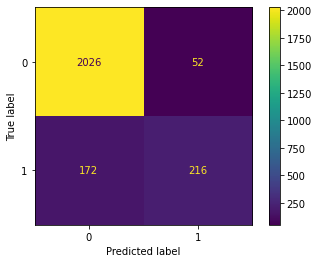

In [22]:

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_palette

plt.figure(figsize=(5,5))
set_palette("Set2")

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_estimator(rf_fit, X_test, y_test)

From the confusion matrix above, we can see that true positive prediction is 2026, which means that 2026 data points are correctly predicted as positive and similarly, 216 labels are correctly predicted as negative. Give the high accuracy score of 0.909, such result makes sense. This disparity is caused by the imbalance of the target variable

### 7.2 BaggingClassifier()

In [8]:
from sklearn.ensemble import BaggingClassifier

In [25]:
bag_clf = BaggingClassifier(n_estimators=10, random_state=0)

In [26]:
bag_fit = bag_clf.fit(X_train, y_train)

/Users/redface/opt/anaconda3/envs/NEWANLY501/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
y_pred_bag = bag_fit.predict(X_test)

In [29]:
bag_accu = accuracy_score(y_test, y_pred_bag)

In [47]:
print(bag_accu)

0.8925385239253852


<Figure size 360x360 with 0 Axes>

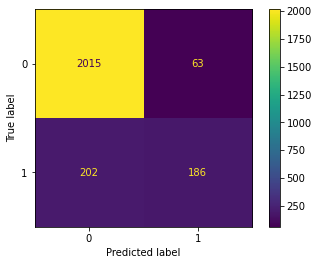

In [30]:
plt.figure(figsize=(5,5))
set_palette("Set2")

conf_matrix = confusion_matrix(y_test, y_pred_bag)
ConfusionMatrixDisplay.from_estimator(bag_fit, X_test, y_test)

We can see that bagging classifier has a similar accuracy score as random forest classifier

### 7.3 XGboostclassifier()

In [9]:
import xgboost as xgb

In [34]:
xg_clf = xgb.XGBClassifier(tree_method="hist", n_estimators=10)

In [35]:
xg_fit = xg_clf.fit(X_train, y_train)

In [36]:
y_pred_xg = xg_fit.predict(X_test)

In [40]:
xg_accu = accuracy_score(y_test, y_pred_xg)

<Figure size 360x360 with 0 Axes>

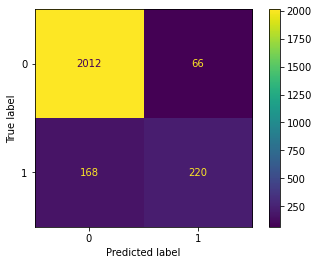

In [42]:
plt.figure(figsize=(5,5))
set_palette("Set2")

conf_matrix = confusion_matrix(y_test, y_pred_xg)
ConfusionMatrixDisplay.from_estimator(xg_fit, X_test, y_test)

## 8. Classification with GridSearchCV (8 Points):

## 9. Classification with RandomSearchCV (8 Points):

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [13]:
# Define the classifiers
classifiers = [
    ('RandomForest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
    }),
    ('Bagging', BaggingClassifier(base_estimator=RandomForestClassifier()), {
        'n_estimators': [10, 50, 100],
    }),
    ('XGBoost', XGBClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [4, 6, 8],
    }),
]

In [16]:
# Store the best models and their accuracy scores
best_models = {}
best_accuracies = []

# Perform RandomizedSearchCV for each classifier
for name, clf, param_dist in classifiers:
    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)
    random_search.fit(X_train, y_train)
    best_model = random_search.best_estimator_
    best_models[name] = best_model
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    best_accuracies.append((name, accuracy))

c:\Users\84160\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\84160\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\84160\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\84160\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

In [ ]:
# Print the best hyperparameters and models for each classifier
for name, model in best_models.items():
    print(f"Best {name} Hyperparameters: {model.get_params()}")

In [25]:
best_accuracies
for model in best_accuracies:
    print(f"Accuracy of best {model[0]}: {model[1]}")

Accuracy of best RandomForest: 0.907948094079481
Accuracy of best Bagging: 0.9063260340632603
Accuracy of best XGBoost: 0.9083536090835361


## 10. Comparison and Analysis (5 Points):